### Analyysejä analysointiosaamisen tehtävään 2

In [2]:
# Kirjastojen tuonti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Kaavioiden tyylimäärittely
plt.style.use('seaborn-whitegrid')

# Datan avaaminen
df=pd.read_excel('https://myy.haaga-helia.fi/~taaak/a/t2aineisto.xlsx')
df.head()

,Rahaston nimi,5 vuoden tuotto (% vuodessa),3 vuoden tuotto (% vuodessa),1 vuoden tuotto,6 kuukauden tuotto,Hallinn. ja säilytyspalkkio (% vuodessa),Rahastoluokka
0,Aktia Capital,0.057994,0.036465,0.119639,0.000460,0.0183,EQ_FINLAND
1,Danske Invest Suomen Pienyhtiöt K,0.080784,0.047014,0.214640,0.026255,0.0130,EQ_FINLAND
2,Danske Invest Suomi Osake,0.043333,0.025153,0.069277,-0.021402,0.0140,EQ_FINLAND
3,Danske Invest Suomi Osake I K,0.052653,0.029280,0.077320,-0.019227,0.0095,EQ_FINLAND
4,Danske Invest Suomi Osake I T,NaN,NaN,NaN,-0.066823,0.0095,EQ_FINLAND


In [3]:
# Lyhyemmät nimet muuttujille
df.columns=['nimi', 'tuotto 5v', 'tuotto 3v', 'tuotto 1v', 'tuotto 6kk', 'palkkio', 'rahastoluokka']

In [4]:
#Tilastolliset tunnusluvut rahastoluokittain
df.groupby('rahastoluokka').describe().T

rahastoluokka     EQ_EMER_GLOBAL   EQ_EUROPE  EQ_FINLAND   EQ_NORAM
tuotto 5v  count       47.000000   98.000000   33.000000  56.000000
           mean         0.030764    0.007988    0.068681   0.067235
           std          0.039559    0.032605    0.022043   0.041024
           min         -0.066296   -0.096064    0.033769  -0.026373
           25%          0.014328   -0.007594    0.054329   0.034767
           50%          0.034583    0.004205    0.068281   0.072898
           75%          0.060830    0.031267    0.075807   0.088219
           max          0.088375    0.087708    0.132362   0.165811
tuotto 3v  count       53.000000  106.000000   33.000000  66.000000
           mean         0.012624   -0.002724    0.040567   0.083473
           std          0.044993    0.047392    0.028129   0.064939
           min         -0.093900   -0.170996   -0.022747  -0.092008
           25%         -0.008411   -0.024849    0.027685   0.034227
           50%          0.021968    0.000800    0.042255   0.095420
           75%          0.042582    0.019518    0.052296   0.111689
           max          0.085515    0.143038    0.132613   0.248994
tuotto 1v  count       60.000000  119.000000   40.000000  68.000000
           mean        -0.048479   -0.040883    0.107079   0.010460
           std          0.113752    0.096190    0.063922   0.101700
           min         -0.313447   -0.337299    0.005820  -0.201586
           25%         -0.094815   -0.073571    0.074801  -0.049464
           50%         -0.040281   -0.044360    0.085331   0.022750
           75%          0.021405   -0.001199    0.129700   0.075400
           max          0.220075    0.234200    0.301775   0.290749
tuotto 6kk count       60.000000  120.000000   42.000000  71.000000
           mean        -0.078669   -0.109502   -0.028753  -0.063478
           std          0.086207    0.074518    0.027808   0.076023
           min         -0.287205   -0.316984   -0.120842  -0.219701
           25%         -0.098278   -0.135472   -0.044504  -0.108832
           50%         -0.063498   -0.111723   -0.024965  -0.050492
           75%         -0.033650   -0.070482   -0.017676  -0.026234
           max          0.111272    0.146513    0.035040   0.166818
palkkio    count       62.000000  124.000000   42.000000  78.000000
           mean         0.014727    0.012083    0.012033   0.011463
           std          0.006255    0.005691    0.005809   0.006049
           min          0.002000    0.000000    0.001590   0.000000
           25%          0.009500    0.008000    0.006525   0.006125
           50%          0.015000    0.012000    0.013000   0.011000
           75%          0.019000    0.018000    0.017500   0.017375
           max          0.025000    0.020000    0.020000   0.020000

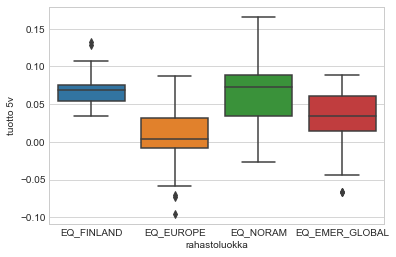

In [5]:
sns.boxplot(x='rahastoluokka', y='tuotto 5v', data=df)

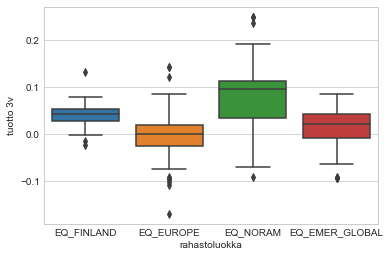

In [6]:
sns.boxplot(x='rahastoluokka', y='tuotto 3v', data=df)

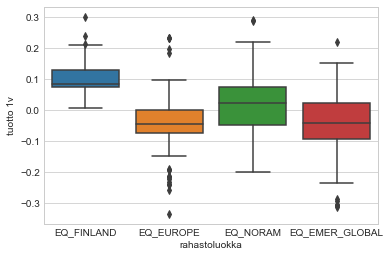

In [7]:
sns.boxplot(x='rahastoluokka', y='tuotto 1v', data=df)

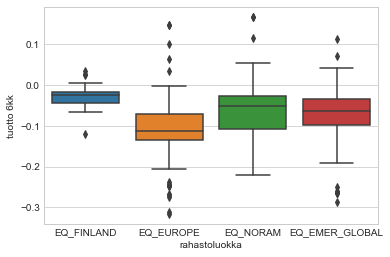

In [8]:
sns.boxplot(x='rahastoluokka', y='tuotto 6kk', data=df)

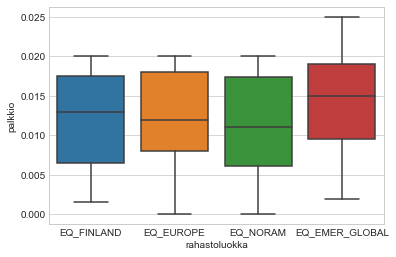

In [9]:
sns.boxplot(x='rahastoluokka', y='palkkio', data=df)

In [10]:
# Korrelaatiokertoimen 1v tuoton ja palkkion välille rahastoluokittain
df.groupby('rahastoluokka')[['tuotto 1v','palkkio']].corr()

tuotto 1v   palkkio
rahastoluokka                                
EQ_EMER_GLOBAL tuotto 1v   1.000000 -0.198664
               palkkio    -0.198664  1.000000
EQ_EUROPE      tuotto 1v   1.000000  0.117043
               palkkio     0.117043  1.000000
EQ_FINLAND     tuotto 1v   1.000000  0.386081
               palkkio     0.386081  1.000000
EQ_NORAM       tuotto 1v   1.000000 -0.069800
               palkkio    -0.069800  1.000000

In [11]:
# pearsonr-funktion tuonti scipy.stats-kirjastosta
from scipy.stats import pearsonr

# Korrelaatiokertoimet ja p-arvot 1v tuoton ja palkkion välille rahastoluokittain
for luokka in pd.unique(df['rahastoluokka']):
    df_dropna = df[df['rahastoluokka']==luokka].dropna(subset=['tuotto 1v', 'palkkio'])
    corr, p = pearsonr(df_dropna['tuotto 1v'], df_dropna['palkkio'])
    print(luokka, 'korrelaatio %.3f,' %corr, 'p-arvo %.3f' %p)

EQ_FINLAND korrelaatio 0.386, p-arvo 0.014
EQ_EUROPE korrelaatio 0.117, p-arvo 0.205
EQ_NORAM korrelaatio -0.070, p-arvo 0.572
EQ_EMER_GLOBAL korrelaatio -0.199, p-arvo 0.128


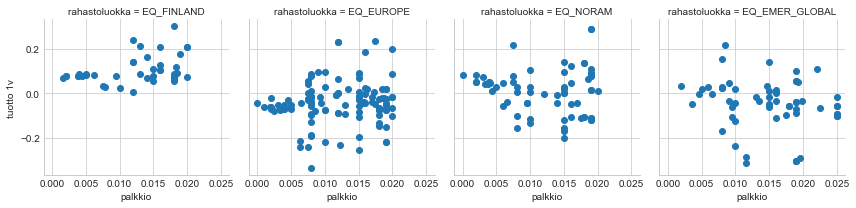

In [12]:
# 1v tuotot ja palkkiot pistekaavioina rahastoluokittain
g = sns.FacetGrid(data=df, col='rahastoluokka')
g = g.map(plt.scatter, 'palkkio', 'tuotto 1v')